# Exercise 1: Correlation Analysis
### (1) Load the communities in the US into a pandas dataframe

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sp
from math import sqrt
from itertools import groupby

data = pd.read_csv('censusCrimeClean.csv')
data.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


### (2) choose two columns to save as variables

In [24]:
medIncome = data['medIncome'].values
ViolentCrimesPerPop = data['ViolentCrimesPerPop'].values

### (3) Perform a Pearson correlation and note the correlation value

In [25]:
pearson = sp.stats.pearsonr(medIncome, ViolentCrimesPerPop)
print('the correlation coefficient is: '+ str(pearson[0]))
print ('the p-value is:' + str(pearson[1]))

the correlation coefficient is: -0.424220616726126
the p-value is:6.334424808048533e-88


### (4) Perform a Spearman correlation computation and note the correlation value

In [26]:
spearman = sp.stats.spearmanr(medIncome, ViolentCrimesPerPop)
print('the correlation coefficient is:'+str(spearman[0]))
print('the p-value is:'+str(spearman[1]))

the correlation coefficient is:-0.482169950997556
the p-value is:1.2978853095169542e-116


### (5) Comment on the differences/similarities in relation to a scaterplot visualisation of the two columns

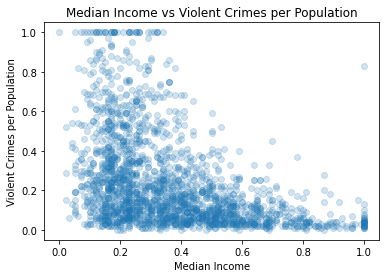

In [27]:
plt.title('Median Income vs Violent Crimes per Population')
plt.xlabel('Median Income')
plt.ylabel('Violent Crimes per Population')
plt.scatter(medIncome, ViolentCrimesPerPop, alpha=0.2);

points are mainly concentrated on the bottom left corner.</p> The pearson correlation is highly affected by outliers, and requires the dataset to be normally distributed.</p>
The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed</p>
both have negative correlation coefficients implying that as x increased, y decreases

# Exercise 2: Significance Testing

In [28]:
df = pd.read_csv('heart.csv')
df['gender']= np.nan
df['hasHeartDisease']= np.nan

## Does the resting blood pressure (trestbps) differ between those with the disease and those without?
### (1) Calculate the means and std deviations. How do they compare between groups and by how much? If someone asked you whether they vary, what would you say?

In [29]:
has_hd = df.loc[df['target']==0]
no_hd = df.loc[df['target']==1]


In [30]:
print('MEAN & STD DEVIATION OF THOSE WITH HEART DISEASE')
has_hd.describe()

MEAN & STD DEVIATION OF THOSE WITH HEART DISEASE


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,hasHeartDisease
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0,0.0,0.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0,NaN,NaN
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0,NaN,NaN
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0,NaN,NaN
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0,NaN,NaN
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0,NaN,NaN
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0,NaN,NaN


In [31]:
print('MEAN & STD DEVIATION OF THOSE WITHOUT HEART DISEASE')
no_hd.describe()

MEAN & STD DEVIATION OF THOSE WITHOUT HEART DISEASE


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,hasHeartDisease
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,0.0,0.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0,NaN,NaN
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0,NaN,NaN
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,NaN,NaN
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0,NaN,NaN
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0,NaN,NaN
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0,NaN,NaN


the mean resting BP is lower for those without HD.

### (2) Create boxplots and histograms to compare the means and distributions.

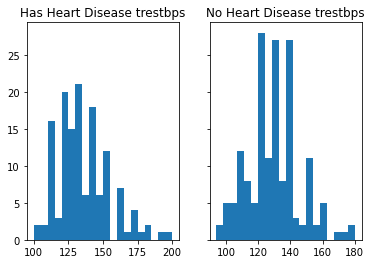

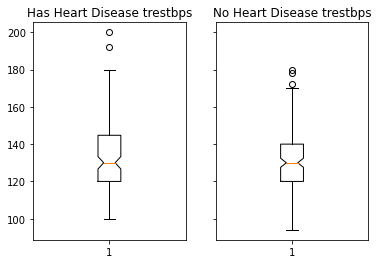

In [32]:
#histogram
f, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)
ax1.hist(has_hd['trestbps'], 20)
ax1.set_title('Has Heart Disease trestbps')
ax2.hist(no_hd['trestbps'], 20)
ax2.set_title('No Heart Disease trestbps')
plt.show()

#boxplot
f, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)
ax1.boxplot(has_hd['trestbps'], 20)
ax1.set_title('Has Heart Disease trestbps')
ax2.boxplot(no_hd['trestbps'], 20)
ax2.set_title('No Heart Disease trestbps')
plt.show()

### (3) Compare the means using scipy.stat's ttest_ind() function. What is the p-value telling you? Does this relate to the judgements you made above?

In [33]:
target = df['target'].values
trestbps=df['trestbps'].values
sp.ttest_ind(target,trestbps)

Ttest_indResult(statistic=-130.04567710371222, pvalue=0.0)

### Calculate Cohen's d

In [119]:
# function to calculate Cohen's d for independent samples
n1 = len(target) 
n2 = len(trestbps)

# calculate the variance of the samples
s1 = target.var()
s2 = trestbps.var()

# calculate the pooled standard deviation
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# calculate the means of the samples
u1, u2 = target.mean(), trestbps.mean()

# calculate the effect size
print((u1 - u2) / s)

-10.582967114008186


## Is the proportion of men and women who get heart disease the same?
Calculate the proportion of men and women who have heart disease from the sample.

In [120]:
# calculating the total number of each gender
females = (df['sex']==0).sum()
males= (df['sex']==1).sum()

# calculating the number of each gender with heart disease
female_hd=(has_hd['sex']==0).sum()
male_hd=(has_hd['sex']==1).sum()

p_men = male_hd/males
p_female = female_hd/females

print("proportion of men with hearth disease: " + str(p_men))
print('proportion of women with heart disease: ' +str(p_female))

proportion of men with hearth disease: 0.5507246376811594
proportion of women with heart disease: 0.25


#### Alternate method:

In [125]:
#Count the number with the disease for each gender type
hasDiseaseCount=df[df.target==True].groupby("sex").count().target

#Count the number of gender type
totalCount=df.groupby("sex").count()['target']

#combine into a dataframe (both are indexed with gender, so will be matched) and specify the columns
p=pd.concat([hasDiseaseCount, totalCount], axis=1)
p.columns = ["heartDiseaseCount", "totalCount"]

#create a new column and calculate the proportion
p['propHeartDisease']=p["heartDiseaseCount"]/p["totalCount"]

#print the results
p.head()

,heartDiseaseCount,totalCount,propHeartDisease
sex,,,
0,72,96,0.750000
1,93,207,0.449275


### (2) We will use Null Hypothesis Statistical Testing (NHST) to help determine whether this difference is likely to be present in the population. Follow through this guide that explains how with the second method entitled Hypothesis Tests for the Difference in Two Proportions. This explains how to set up a Null Hypothesis test. The table in step 3 is what we calculate above (should be the same).

In [129]:
# Get p1 and p2 from the chart p above
p_fe = 0.750000
p_male = 0.449275


p_us = len(df[df['target']==0])/len(df)
p = p_us 
n1 = 96
n2 = 207
se = np.sqrt(p_us*(1-p_us)*(1/n1 + 1/n2))

#calculate the best estimate
be = p_fe - p_male  #Calculate the hypothesized estimate

#Our null hypothesis is p1 - p2 = 0he = 0  #Calculate the test statistic
test_statistic = (be - he)/se

pvalue = 2*dist.norm.cdf(-np.abs(test_statistic)

NameError: name 'he' is not defined

AttributeError: 'float' object has no attribute 'iloc'